# **1. Perkenalan Dataset**


Dataset yang digunakan dalam eksperimen ini adalah "Supplement Sales Weekly Expanded" yang diperoleh dari Kaggle. Dataset ini berisi data penjualan suplemen mingguan yang diperluas, mencakup berbagai atribut yang berkaitan dengan transaksi penjualan.

Informasi lebih lanjut mengenai dataset dapat ditemukan di: [https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data](https://www.kaggle.com/datasets/zahidmughal2343/supplement-sales-data)

**Deskripsi Kolom:**

* **Date**: Tanggal (mingguan) penjualan dilakukan.
* **Product Name**: Nama suplemen yang terjual (misalnya, Whey Protein, Vitamin C, dll.).
* **Category**: Kategori suplemen (misalnya, Protein, Vitamin, Omega).
* **Units Sold**: Jumlah unit yang terjual dalam minggu tersebut.
* **Price**: Harga jual produk.
* **Revenue**: Total pendapatan yang dihasilkan (Units Sold * Price).
* **Discount**: Diskon yang diterapkan pada produk (sebagai persentase dari harga asli).
* **Units Returned**: Jumlah unit yang dikembalikan dalam minggu tersebut.
* **Location**: Lokasi penjualan (USA, UK, atau Canada).
* **Platform**: Platform e-commerce tempat penjualan terjadi (Amazon, Walmart, iHerb).

**Tujuan Eksperimen:**
Tujuan dari eksperimen ini adalah untuk melakukan eksplorasi data, membersihkan data, dan mempersiapkannya untuk tahap pemodelan machine learning. Langkah-langkah ini krusial untuk membangun model yang akurat dan andal.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Mengatur agar visualisasi Matplotlib dan Seaborn ditampilkan inline di notebook
%matplotlib inline

# Mengatur beberapa opsi Pandas untuk tampilan yang lebih baik
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
file_path = '/content/Supplement_Sales_Weekly_Expanded.csv'

# Memuat dataset
try:
    df_raw = pd.read_csv(file_path)
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di path '{file_path}'. Pastikan file CSV ada di folder 'namadataset_raw'.")
    df_raw = pd.DataFrame()

# Menampilkan 5 baris pertama dari dataset
print("\n5 baris pertama dari dataset (df_raw):")
display(df_raw.head())

# Menyimpan dataset asli untuk referensi
df = df_raw.copy()

Dataset berhasil dimuat!

5 baris pertama dari dataset (df_raw):


,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.980,4573.140,0.030,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.510,5908.890,0.040,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.910,2078.510,0.250,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.070,2249.800,0.080,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.470,5568.790,0.250,3,Canada,iHerb


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Informasi Dasar Dataset

In [3]:
# Menampilkan informasi dasar tentang dataset
print("Informasi Dataset (df):")
df.info()

# Menampilkan dimensi dataset (jumlah baris dan kolom)
print(f"\nDimensi dataset: {df.shape[0]} baris dan {df.shape[1]} kolom")

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif untuk Kolom Numerik:")
display(df.describe().transpose())

# Menampilkan statistik deskriptif untuk kolom kategorikal/objek
print("\nStatistik Deskriptif untuk Kolom Kategorikal:")
display(df.describe(include=['object']).transpose())

Informasi Dataset (df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB

Dimensi dataset: 4384 baris dan 10 kolom

Statistik Deskriptif untuk Kolom Numerik:


,count,mean,std,min,25%,50%,75%,max
Units Sold,4384.000,150.200,12.396,103.000,142.000,150.000,158.000,194.000
Price,4384.000,34.781,14.198,10.000,22.598,34.720,46.712,59.970
Revenue,4384.000,5226.569,2192.492,1284.000,3349.372,5173.140,7009.960,10761.850
Discount,4384.000,0.124,0.072,0.000,0.060,0.120,0.190,0.250
Units Returned,4384.000,1.531,1.258,0.000,1.000,1.000,2.000,8.000



Statistik Deskriptif untuk Kolom Kategorikal:


,count,unique,top,freq
Date,4384,274,2025-03-31,16
Product Name,4384,16,Whey Protein,274
Category,4384,10,Vitamin,822
Location,4384,3,Canada,1507
Platform,4384,3,iHerb,1499


## 4.2 Pemeriksaan Nilai Hilang (Missing Values)

In [4]:
# Memeriksa jumlah nilai yang hilang (NaN) per kolom
print("Jumlah Nilai Hilang per Kolom:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("\nTidak ada nilai yang hilang dalam dataset.")
else:
    # Menampilkan persentase nilai yang hilang per kolom
    print("\nPersentase Nilai Hilang per Kolom:")
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

Jumlah Nilai Hilang per Kolom:
Series([], dtype: int64)

Tidak ada nilai yang hilang dalam dataset.


## 4.3 Pemeriksaan Data Duplikat

In [5]:
# Memeriksa jumlah baris duplikat
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat dalam dataset: {duplicate_rows}")

Jumlah baris duplikat dalam dataset: 0


## 4.4 Analisis Kolom Individual

In [6]:
# Mengidentifikasi kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print(f"Kolom Numerik: {numerical_cols}")
print(f"Kolom Kategorikal: {categorical_cols}")

# Menganalisis nilai unik untuk setiap kolom kategorikal
print("\nNilai Unik per Kolom Kategorikal:")
for col in categorical_cols:
    print(f"  {col}: {df[col].nunique()} nilai unik -> {df[col].unique()[:5]}...")

# Menganalisis nilai unik untuk kolom 'Date'
if 'Date' in df.columns:
    print(f"  Date: {df['Date'].nunique()} nilai unik")
    try:
        # Mencoba konversi ke datetime untuk analisis lebih lanjut
        pd.to_datetime(df['Date'])
        print("    Kolom 'Date' dapat dikonversi ke format datetime.")
    except ValueError:
        print("    Kolom 'Date' mungkin memiliki format yang tidak standar atau beragam.")

Kolom Numerik: ['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']
Kolom Kategorikal: ['Date', 'Product Name', 'Category', 'Location', 'Platform']

Nilai Unik per Kolom Kategorikal:
  Date: 274 nilai unik -> ['2020-01-06' '2020-01-13' '2020-01-20' '2020-01-27' '2020-02-03']...
  Product Name: 16 nilai unik -> ['Whey Protein' 'Vitamin C' 'Fish Oil' 'Multivitamin' 'Pre-Workout']...
  Category: 10 nilai unik -> ['Protein' 'Vitamin' 'Omega' 'Performance' 'Amino Acid']...
  Location: 3 nilai unik -> ['Canada' 'UK' 'USA']...
  Platform: 3 nilai unik -> ['Walmart' 'Amazon' 'iHerb']...
  Date: 274 nilai unik
    Kolom 'Date' dapat dikonversi ke format datetime.


## 4.5 Visualisasi Distribusi Data

### 4.5.1 Distribusi Kolom Numerik


Distribusi Kolom Numerik:


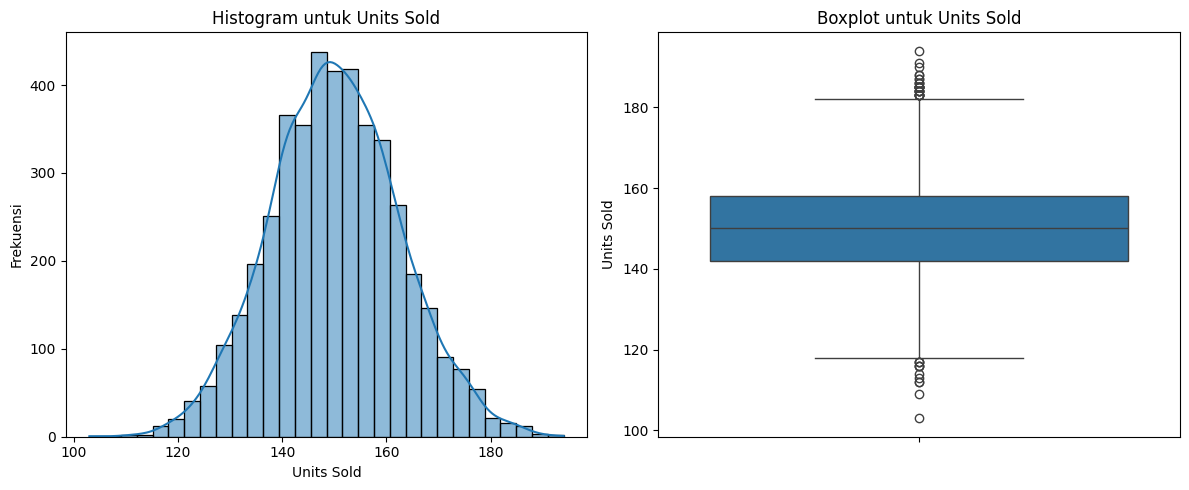

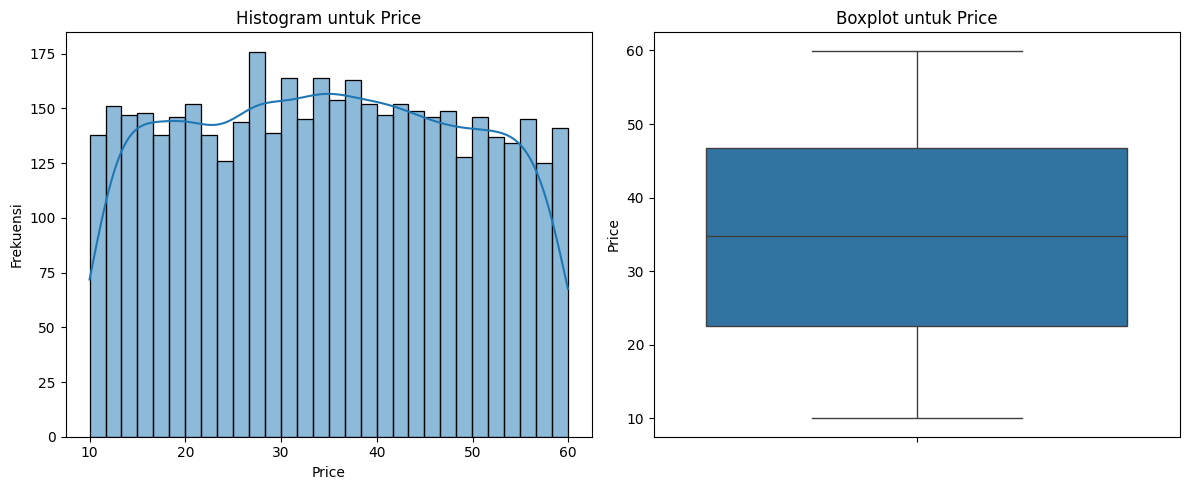

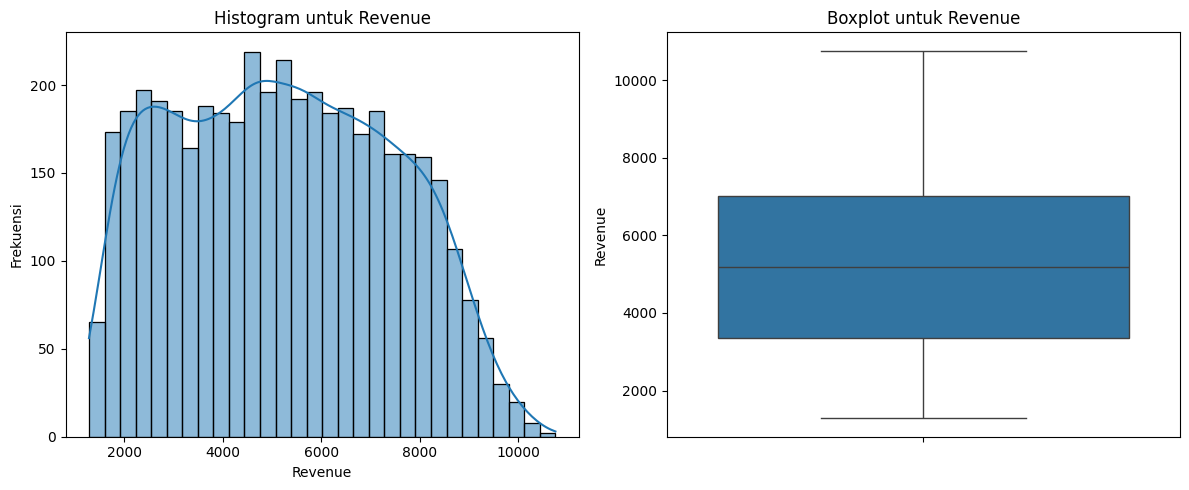

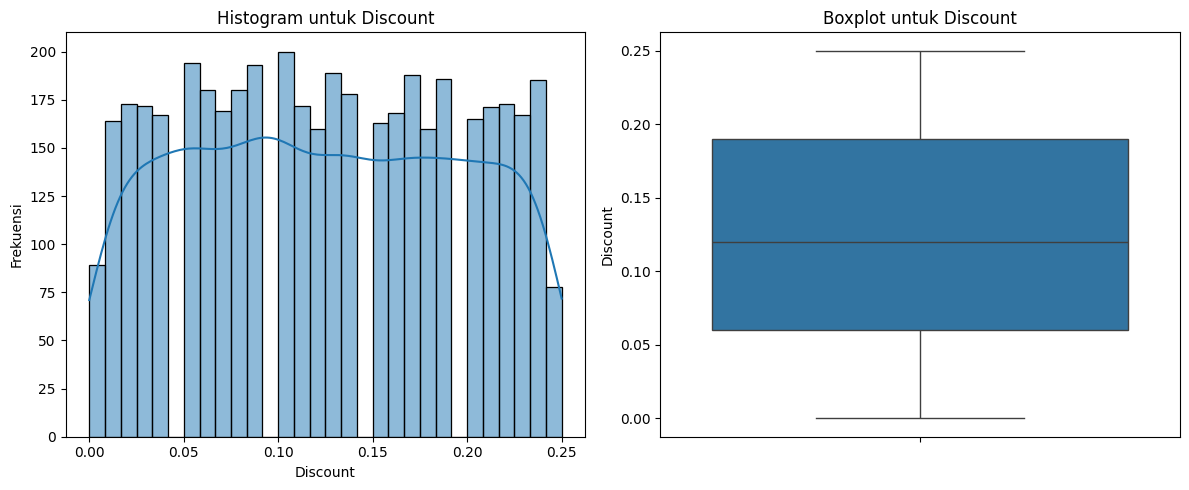

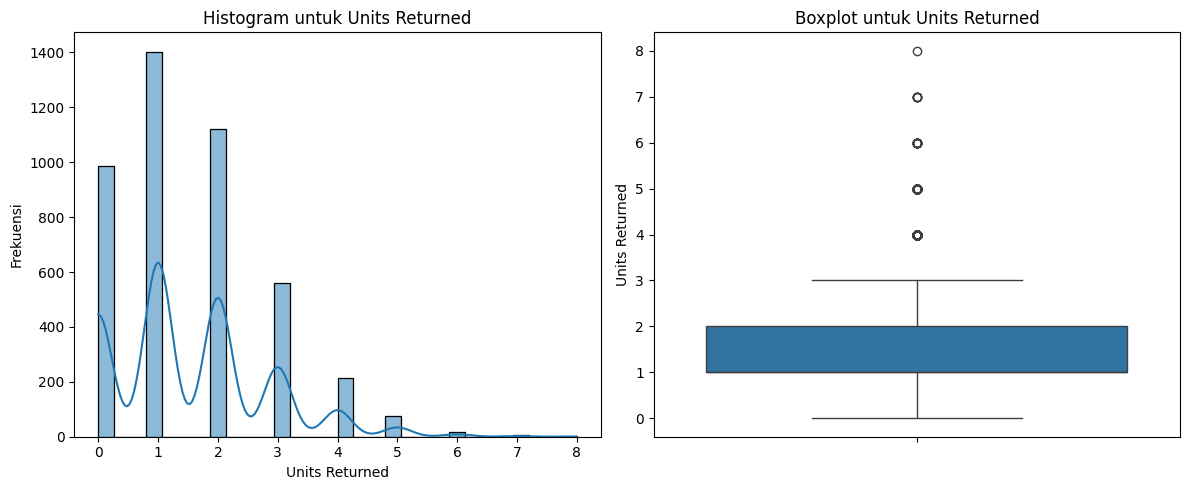

In [7]:
print("\nDistribusi Kolom Numerik:")
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Plot Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram untuk {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    # Plot Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot untuk {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

### 4.5.2 Distribusi Kolom Kategorikal


Distribusi Kolom Kategorikal:


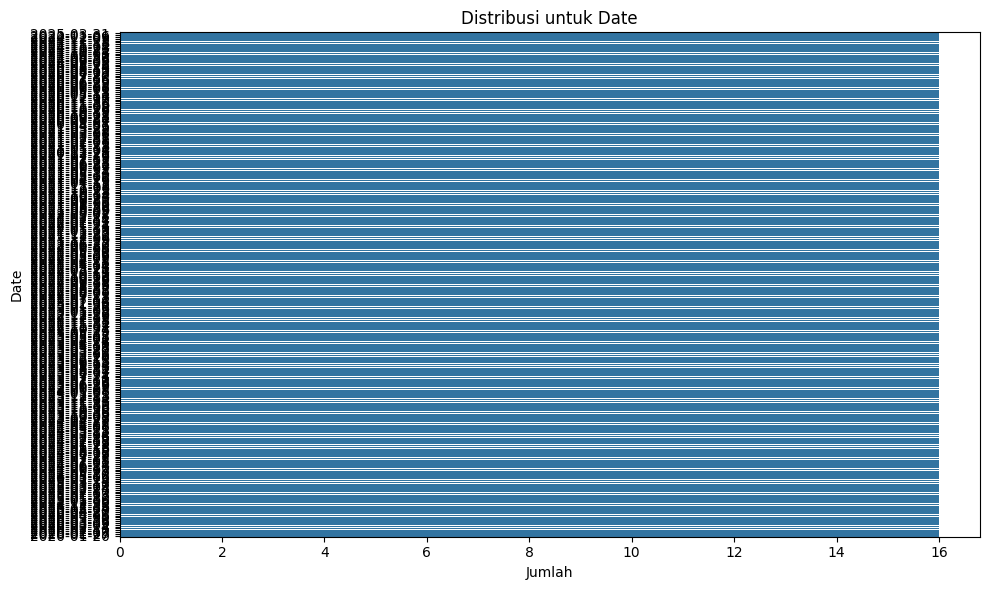

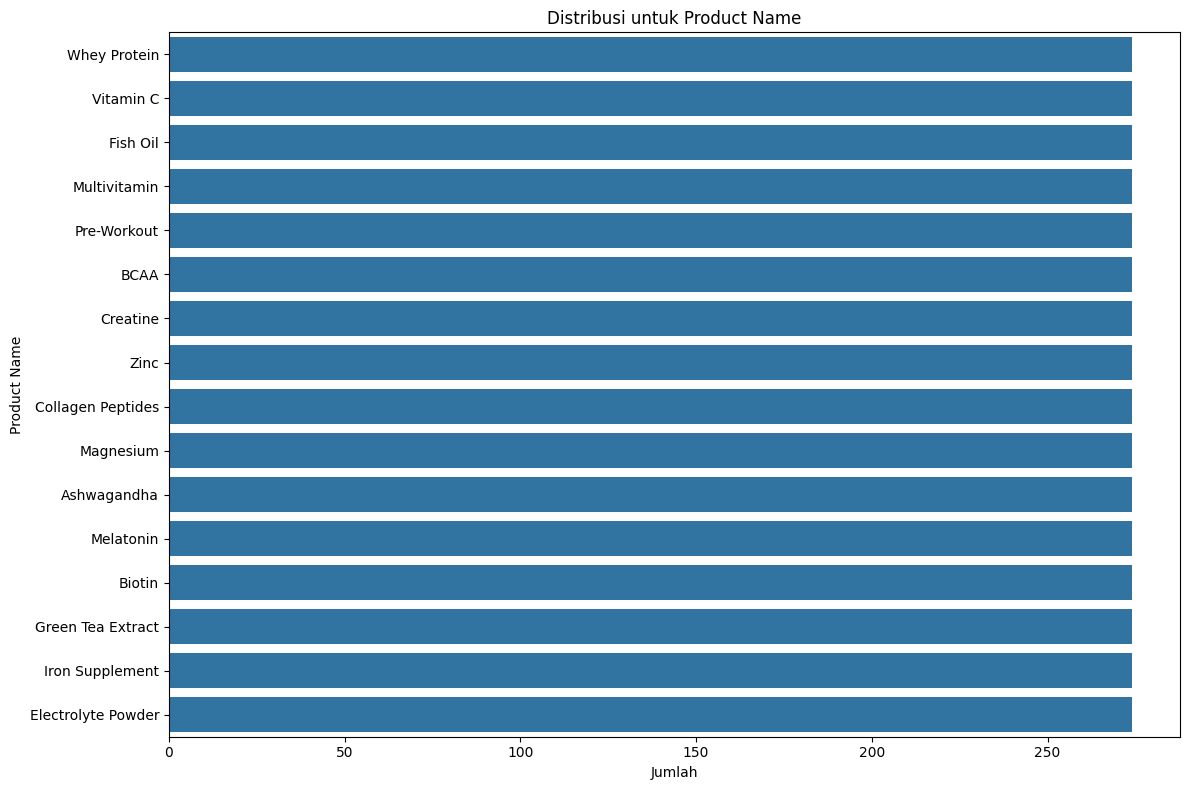

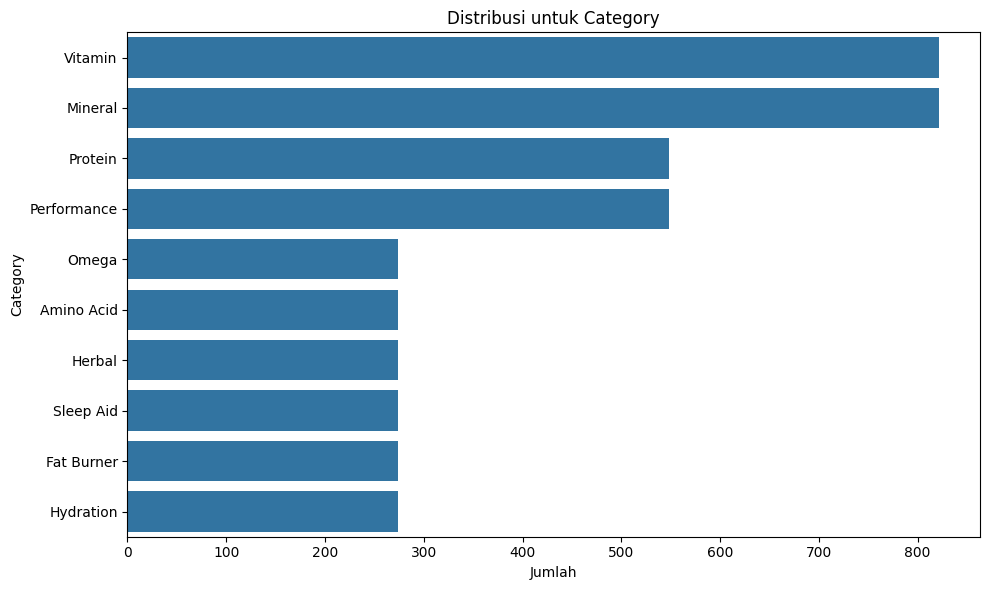

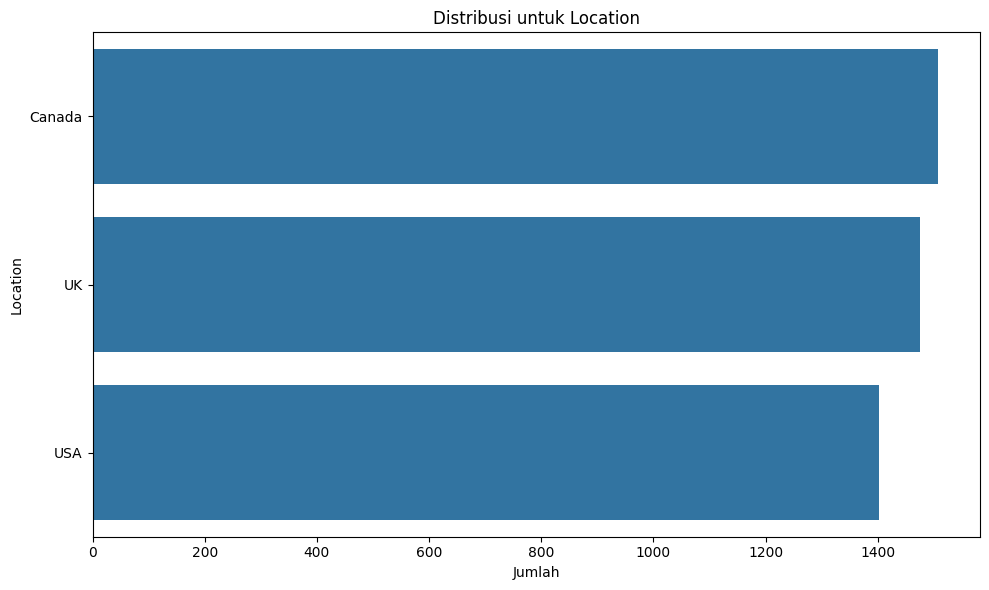

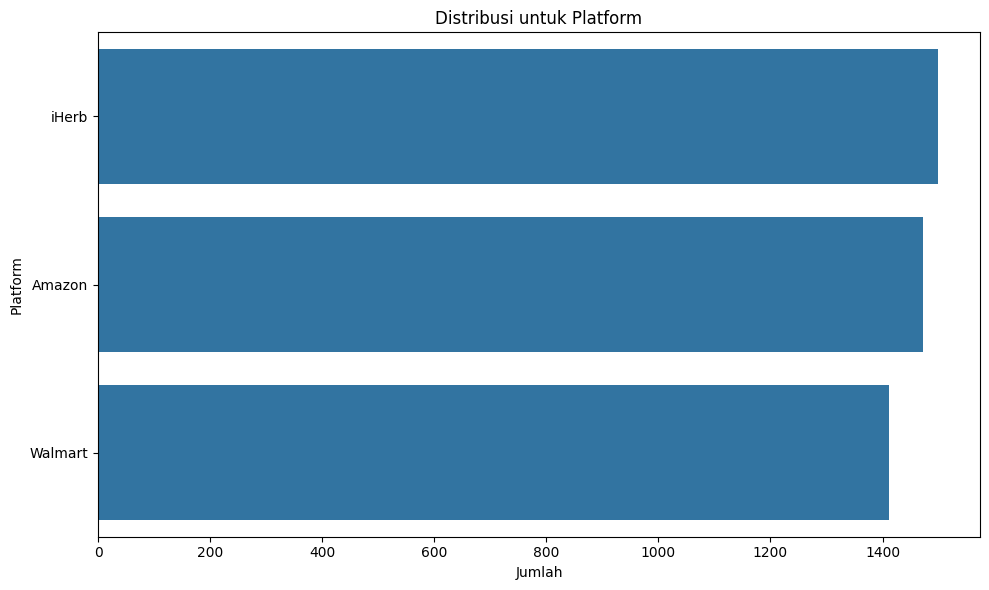

In [8]:
print("\nDistribusi Kolom Kategorikal:")
for col in categorical_cols:
    if col != 'Product Name':
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Distribusi untuk {col}')
        plt.xlabel('Jumlah')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    elif df[col].nunique() <= 20:
        plt.figure(figsize=(12, 8))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Distribusi untuk {col}')
        plt.xlabel('Jumlah')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Kolom '{col}' memiliki {df[col].nunique()} nilai unik, plot count tidak ditampilkan untuk menjaga keterbacaan.")

## 4.6 Analisis Korelasi (untuk Kolom Numerik)

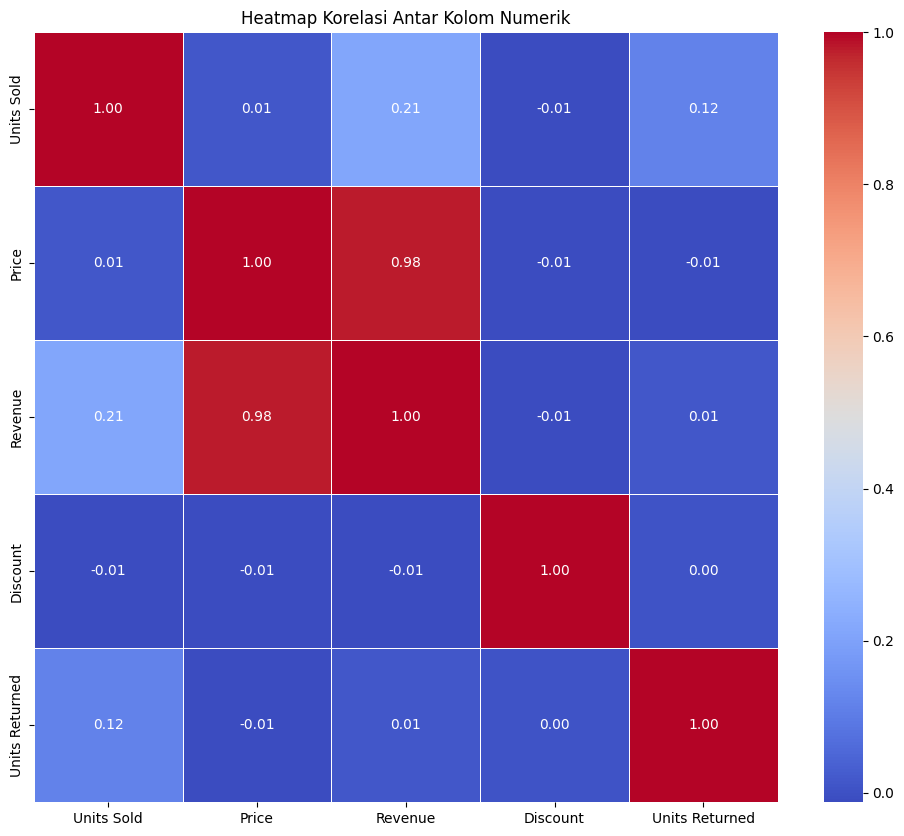

In [9]:
# Memastikan hanya kolom numerik yang valid yang dimasukkan ke dalam perhitungan korelasi
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Kolom Numerik')
plt.show()

## 4.7. Wawasan Awal dari EDA

Berdasarkan analisis eksplorasi data yang telah dilakukan, beberapa temuan awal adalah:

1.  **Struktur Data**: Dataset terdiri dari 4384 baris dan 10 kolom. Tipe data sudah sesuai untuk sebagian besar kolom, namun kolom 'Date' perlu dikonversi ke format datetime untuk analisis time-series lebih lanjut.
2.  **Nilai Hilang**: Tidak ada nilai yang hilang dalam dataset.
3.  **Data Duplikat**: Tidak ditemukan data duplikat dalam dataset.
4.  **Distribusi Data**:
    - Kolom `Units Sold` menunjukkan distribusi yang mendekati normal (simetris atau bell-shaped), dengan sebagian besar penjualan unit berkisar antara sekitar 120 hingga 170 unit, dan puncak frekuensi berada di sekitar 140-150 unit.
    - Kolom `Revenue` menunjukkan distribusi yang tampak agak left-skewed atau multimodal, dengan frekuensi tertinggi untuk pendapatan di kisaran 4000 hingga 6000. Tidak ada nilai pendapatan yang ekstrem tinggi yang menonjol.
    - Kolom `Price` memiliki distribusi yang relatif seragam (atau sedikit multimodal) antara rentang harga sekitar 10 hingga 60, tanpa adanya konsentrasi harga pada nilai tertentu.
    - Kolom `Discount` menunjukkan distribusi yang relatif seragam untuk nilai diskon antara 0.00 hingga 0.25. Ini mengindikasikan bahwa berbagai tingkat diskon diterapkan secara cukup merata.
    - Kolom `Units Returned` menunjukkan distribusi yang sangat right-skewed, di mana sebagian besar transaksi memiliki jumlah unit yang dikembalikan sangat sedikit (mayoritas 0, 1, atau 2 unit), dan frekuensi menurun tajam untuk jumlah pengembalian yang lebih tinggi.
    - Untuk kolom kategorikal seperti `Location` dan `Platform`, kategori iHerb untuk `Platform` paling sering muncul. Kemudian kategori Canada untuk `Location` paling sering muncul.
5.  **Korelasi**:
    - Terdapat korelasi positif yang sangat kuat antara `Price` dan `Revenue` (koefisien korelasi 0.98), yang mengindikasikan bahwa semakin tinggi harga suatu produk, semakin tinggi pula pendapatan yang dihasilkan, dan sebaliknya.
    - Terdapat korelasi positif yang moderat antara `Units Sold` dan `Revenue` (koefisien korelasi 0.21), yang memang diharapkan; semakin banyak unit terjual, semakin tinggi pendapatan.
    - Terdapat korelasi positif yang lemah antara `Units Sold` dan `Units Returned` (koefisien korelasi 0.12), yang mungkin menunjukkan bahwa produk yang lebih banyak terjual cenderung sedikit lebih banyak dikembalikan.
    - Kolom `Discount` menunjukkan korelasi yang sangat lemah (mendekati nol) dengan semua variabel lainnya, mengindikasikan bahwa besarnya diskon tidak memiliki hubungan linear yang kuat dengan jumlah unit terjual, harga, pendapatan, maupun jumlah unit yang dikembalikan dalam dataset ini. Korelasi antara `Price` dan `Units Sold` juga sangat lemah (0.01).
6.  **Outlier**:
    - Boxplot untuk `Units Sold` menunjukkan adanya beberapa potensi outlier di kedua sisi, baik di sisi bawah (sekitar nilai 100-115) maupun di sisi atas (di atas nilai 180).
    - Boxplot untuk `Units Returned` menunjukkan adanya beberapa potensi outlier yang signifikan di sisi atas, dengan nilai pengembalian unit mencapai 4, 5, 6, 7, dan 8, sementara sebagian besar data terkonsentrasi pada nilai pengembalian yang lebih rendah (0-2).
    - Boxplot untuk `Revenue`, `Price`, dan `Discount` tidak menunjukkan adanya outlier yang jelas. Hal ini perlu diinvestigasi lebih lanjut dan mungkin ditangani pada tahap preprocessing, terutama untuk `Units Sold` dan `Units Returned`.
7.  **Lain-lain**:
    * Kolom `Product Name` memiliki 16 nilai unik, yang menunjukkan variasi produk yang luas.

Temuan ini akan menjadi dasar untuk langkah-langkah data preprocessing selanjutnya.

# **5. Data Preprocessing**

Berdasarkan temuan dari EDA, kita akan membersihkan dan mempersiapkan data agar siap untuk tahap pemodelan. Tahapan preprocessing bisa meliputi:

1. Konversi tipe data (khususnya kolom 'Date').
2. Penanganan nilai hilang (jika ada).
3. Penanganan data duplikat (jika ada dan perlu dihapus).
4. Feature Engineering (misalnya, mengekstrak fitur baru dari tanggal).
5. Penanganan Outlier (jika diidentifikasi dan dianggap perlu).
6. Encoding fitur kategorikal.
7. Scaling/Normalisasi fitur numerik.

Kita akan menggunakan DataFrame df yang merupakan salinan dari data asli.

## 5.1 Konversi Tipe Data

In [10]:
# Menampilkan tipe data kolom 'Date' sebelum konversi
print("Tipe data kolom 'Date' sebelum konversi:", df['Date'].dtype)

# Konversi kolom 'Date' ke tipe datetime
try:
    df['Date'] = pd.to_datetime(df['Date'])
    print("Kolom 'Date' berhasil dikonversi ke datetime.")
    print("Tipe data kolom 'Date' setelah konversi:", df['Date'].dtype)
    # Verifikasi dengan menampilkan beberapa nilai
    print("\nContoh nilai 'Date' setelah konversi:")
    display(df['Date'].head())
except Exception as e:
    print(f"Error saat mengkonversi kolom 'Date': {e}")
    print("Pastikan format tanggal dalam kolom 'Date' konsisten.")

# Membuat salinan DataFrame untuk proses preprocessing selanjutnya
df_processed = df.copy()
print(f"\nDataFrame 'df_processed' dibuat sebagai salinan untuk preprocessing. Dimensi: {df_processed.shape}")

Tipe data kolom 'Date' sebelum konversi: object
Kolom 'Date' berhasil dikonversi ke datetime.
Tipe data kolom 'Date' setelah konversi: datetime64[ns]

Contoh nilai 'Date' setelah konversi:


,Date
0,2020-01-06
1,2020-01-06
2,2020-01-06
3,2020-01-06
4,2020-01-06



DataFrame 'df_processed' dibuat sebagai salinan untuk preprocessing. Dimensi: (4384, 10)


## 5.2. Penanganan Nilai Hilang (Missing Values)

In [11]:
# Memeriksa jumlah nilai yang hilang
print("Memeriksa Nilai Hilang:")
missing_values_check = df_processed.isnull().sum()
any_missing = missing_values_check.sum()

if any_missing == 0:
    print("Sesuai dengan EDA, tidak ada nilai yang hilang dalam dataset.")
else:
    print("Terdapat nilai hilang (bertentangan dengan EDA, perlu diperiksa ulang):")
    print(missing_values_check[missing_values_check > 0])

Memeriksa Nilai Hilang:
Sesuai dengan EDA, tidak ada nilai yang hilang dalam dataset.


## 5.3. Penanganan Data Duplikat

In [12]:
# Memeriksa jumlah baris duplikat
print("\nMemeriksa Data Duplikat (berdasarkan EDA):")
duplicate_rows_check = df_processed.duplicated().sum()

if duplicate_rows_check == 0:
    print("Sesuai dengan EDA, tidak ada baris duplikat dalam dataset.")
else:
    print(f"Terdapat {duplicate_rows_check} baris duplikat (bertentangan dengan EDA, perlu diperiksa ulang).")

print(f"Dimensi dataset saat ini: {df_processed.shape}")


Memeriksa Data Duplikat (berdasarkan EDA):
Sesuai dengan EDA, tidak ada baris duplikat dalam dataset.
Dimensi dataset saat ini: (4384, 10)


## 5.4. Feature Engineering

In [13]:
# Memastikan kolom 'Date' sudah datetime
if pd.api.types.is_datetime64_any_dtype(df_processed['Date']):
    print("\nMelakukan feature engineering dari kolom 'Date'...")
    df_processed['Year'] = df_processed['Date'].dt.year
    df_processed['Month'] = df_processed['Date'].dt.month
    df_processed['Day'] = df_processed['Date'].dt.day
    df_processed['DayOfWeek'] = df_processed['Date'].dt.dayofweek # Senin=0, Minggu=6
    df_processed['WeekOfYear'] = df_processed['Date'].dt.isocalendar().week.astype(int)

    # Menampilkan beberapa fitur baru
    print("Contoh fitur baru dari 'Date':")
    display(df_processed[['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'WeekOfYear']].head())
else:
    print("\nKolom 'Date' bukan datetime. Lewati feature engineering berbasis tanggal.")


Melakukan feature engineering dari kolom 'Date'...
Contoh fitur baru dari 'Date':


,Date,Year,Month,Day,DayOfWeek,WeekOfYear
0,2020-01-06,2020,1,6,0,2
1,2020-01-06,2020,1,6,0,2
2,2020-01-06,2020,1,6,0,2
3,2020-01-06,2020,1,6,0,2
4,2020-01-06,2020,1,6,0,2


## 5.5. Penanganan Outlier


Penanganan Outlier (berdasarkan temuan EDA):

Memeriksa dan menangani outlier untuk kolom: Units Sold
  Statistik untuk Units Sold: Q1=142.00, Q3=158.00, IQR=16.00
  Batas bawah (IQR 1.5x): 118.00, Batas atas (IQR 1.5x): 182.00
  Jumlah potensi outlier terdeteksi di 'Units Sold' sebelum penanganan: 40
  Outlier di 'Units Sold' telah di-clip ke rentang [118.00, 182.00].
  Jumlah potensi outlier terdeteksi di 'Units Sold' setelah clipping: 0


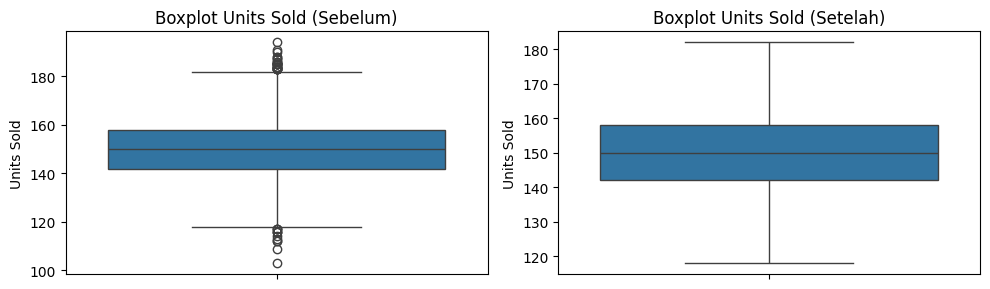


Memeriksa dan menangani outlier untuk kolom: Units Returned
  Statistik untuk Units Returned: Q1=1.00, Q3=2.00, IQR=1.00
  Batas bawah (IQR 1.5x): -0.50, Batas atas (IQR 1.5x): 3.50
  Jumlah potensi outlier terdeteksi di 'Units Returned' sebelum penanganan: 314
  Outlier di 'Units Returned' telah di-clip ke rentang [-0.50, 3.50].
  Jumlah potensi outlier terdeteksi di 'Units Returned' setelah clipping: 0


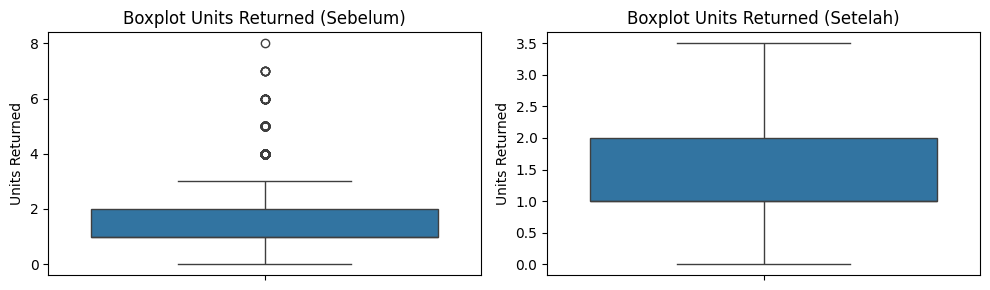


Dimensi dataset setelah penanganan outlier: (4384, 15)

Statistik deskriptif untuk kolom yang ditangani setelah penanganan outlier:


,count,mean,std,min,25%,50%,75%,max
Units Sold,4384.000,150.190,12.296,118.000,142.000,150.000,158.000,182.000
Units Returned,4384.000,1.466,1.106,0.000,1.000,1.000,2.000,3.500


In [14]:
# Kolom numerik yang akan diperiksa untuk outlier berdasarkan EDA
cols_to_treat_outliers = ['Units Sold', 'Units Returned']

print("\nPenanganan Outlier (berdasarkan temuan EDA):")

for col in cols_to_treat_outliers:
    if col in df_processed.columns and pd.api.types.is_numeric_dtype(df_processed[col]):
        print(f"\nMemeriksa dan menangani outlier untuk kolom: {col}")

        # Visualisasi Boxplot Sebelum Penanganan
        plt.figure(figsize=(10, 3))
        plt.subplot(1, 2, 1)
        sns.boxplot(y=df_processed[col])
        plt.title(f'Boxplot {col} (Sebelum)')

        Q1 = df_processed[col].quantile(0.25)
        Q3 = df_processed[col].quantile(0.75)
        IQR_val = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR_val
        upper_bound = Q3 + 1.5 * IQR_val

        outliers_count_before = df_processed[(df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)].shape[0]
        print(f"  Statistik untuk {col}: Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR_val:.2f}")
        print(f"  Batas bawah (IQR 1.5x): {lower_bound:.2f}, Batas atas (IQR 1.5x): {upper_bound:.2f}")
        print(f"  Jumlah potensi outlier terdeteksi di '{col}' sebelum penanganan: {outliers_count_before}")

        if outliers_count_before > 0:
            # Menggunakan clipping untuk menangani outlier
            df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
            df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

            outliers_count_after = df_processed[
                (df_processed[col] < lower_bound) | (df_processed[col] > upper_bound)
            ].shape[0]
            print(f"  Outlier di '{col}' telah di-clip ke rentang [{lower_bound:.2f}, {upper_bound:.2f}].")
            print(f"  Jumlah potensi outlier terdeteksi di '{col}' setelah clipping: {outliers_count_after}")
        else:
            print(f"  Tidak ada outlier signifikan (berdasarkan IQR 1.5x) di '{col}' yang memerlukan clipping.")

        # Visualisasi Boxplot Setelah Penanganan
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df_processed[col])
        plt.title(f'Boxplot {col} (Setelah)')
        plt.tight_layout()
        plt.show()

    else:
        print(f"Kolom '{col}' tidak ditemukan atau bukan numerik, dilewati untuk penanganan outlier.")

print(f"\nDimensi dataset setelah penanganan outlier: {df_processed.shape}")
print("\nStatistik deskriptif untuk kolom yang ditangani setelah penanganan outlier:")
display(df_processed[cols_to_treat_outliers].describe().transpose())

## 5.6. Encoding Fitur Kategorikal

In [15]:
# Mengidentifikasi kolom kategorikal untuk di-encode
categorical_cols_to_encode = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nKolom kategorikal yang akan di-encode: {categorical_cols_to_encode}")

if not categorical_cols_to_encode:
    print("Tidak ada kolom kategorikal untuk di-encode.")
    df_encoded = df_processed.copy()
else:
    # Melakukan One-Hot Encoding
    df_encoded = pd.get_dummies(df_processed, columns=categorical_cols_to_encode, drop_first=True)
    print("\nDataset setelah One-Hot Encoding (beberapa baris pertama):")
    display(df_encoded.head())
    print(f"Dimensi dataset setelah encoding: {df_encoded.shape}")

# Menghapus kolom 'Date' asli karena fitur-fiturnya sudah diekstrak
if 'Date' in df_encoded.columns:
    if pd.api.types.is_datetime64_any_dtype(df_encoded['Date']):
        df_encoded = df_encoded.drop(columns=['Date'])
        print("\nKolom 'Date' asli telah dihapus setelah feature engineering dan encoding.")
        print(f"Dimensi dataset setelah menghapus 'Date': {df_encoded.shape}")
    else:
        date_related_cols = [col for col in df_encoded.columns if col.startswith('Date_')]
        if date_related_cols:
            # Ini terjadi jika 'Date' tidak dikonversi ke datetime dan masih object saat get_dummies
            print(f"Kolom 'Date' sepertinya ter-encode menjadi: {date_related_cols}. Periksa apakah ini diinginkan.")


Kolom kategorikal yang akan di-encode: ['Product Name', 'Category', 'Location', 'Platform']

Dataset setelah One-Hot Encoding (beberapa baris pertama):


,Date,Units Sold,Price,Revenue,Discount,Units Returned,Year,Month,Day,DayOfWeek,WeekOfYear,Product Name_BCAA,Product Name_Biotin,Product Name_Collagen Peptides,Product Name_Creatine,Product Name_Electrolyte Powder,Product Name_Fish Oil,Product Name_Green Tea Extract,Product Name_Iron Supplement,Product Name_Magnesium,Product Name_Melatonin,Product Name_Multivitamin,Product Name_Pre-Workout,Product Name_Vitamin C,Product Name_Whey Protein,Product Name_Zinc,Category_Fat Burner,Category_Herbal,Category_Hydration,Category_Mineral,Category_Omega,Category_Performance,Category_Protein,Category_Sleep Aid,Category_Vitamin,Location_UK,Location_USA,Platform_Walmart,Platform_iHerb
0,2020-01-06,143.000,31.980,4573.140,0.030,2.000,2020,1,6,0,2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,2020-01-06,139.000,42.510,5908.890,0.040,0.000,2020,1,6,0,2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
2,2020-01-06,161.000,12.910,2078.510,0.250,0.000,2020,1,6,0,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,2020-01-06,140.000,16.070,2249.800,0.080,0.000,2020,1,6,0,2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,2020-01-06,157.000,35.470,5568.790,0.250,3.000,2020,1,6,0,2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True


Dimensi dataset setelah encoding: (4384, 39)

Kolom 'Date' asli telah dihapus setelah feature engineering dan encoding.
Dimensi dataset setelah menghapus 'Date': (4384, 38)


## 5.7. Feature Scaling / Normalisasi

In [16]:
# Mengidentifikasi semua kolom numerik yang tersisa
numerical_features_to_scale = df_encoded.select_dtypes(include=np.number).columns.tolist()

print(f"\nKolom numerik yang akan di-scale: {len(numerical_features_to_scale)} kolom")

if not numerical_features_to_scale:
    print("Tidak ada kolom numerik untuk di-scale.")
    df_final_preprocessed = df_encoded.copy()
else:
    scaler = StandardScaler() # Menggunakan StandardScaler

    # Menerapkan scaler ke semua kolom numerik
    scaled_values = scaler.fit_transform(df_encoded[numerical_features_to_scale])

    # Membuat DataFrame baru dengan nilai yang sudah di-scale
    df_final_preprocessed = pd.DataFrame(scaled_values, columns=numerical_features_to_scale, index=df_encoded.index)

    print("\nDataset setelah Feature Scaling (beberapa baris pertama):")
    display(df_final_preprocessed.head())

    print("\nStatistik deskriptif setelah scaling (verifikasi mean ~0 dan std ~1):")
    display(df_final_preprocessed[numerical_features_to_scale].describe().transpose())

print("\nPreprocessing selesai!")
print(f"Dimensi dataset akhir yang telah dipreprocessing: {df_final_preprocessed.shape}")


Kolom numerik yang akan di-scale: 10 kolom

Dataset setelah Feature Scaling (beberapa baris pertama):


,Units Sold,Price,Revenue,Discount,Units Returned,Year,Month,Day,DayOfWeek,WeekOfYear
0,-0.585,-0.197,-0.298,-1.315,0.483,-1.412,-1.512,-1.108,0.000,-1.555
1,-0.910,0.544,0.311,-1.176,-1.325,-1.412,-1.512,-1.108,0.000,-1.555
2,0.879,-1.541,-1.436,1.750,-1.325,-1.412,-1.512,-1.108,0.000,-1.555
3,-0.829,-1.318,-1.358,-0.618,-1.325,-1.412,-1.512,-1.108,0.000,-1.555
4,0.554,0.049,0.156,1.750,1.387,-1.412,-1.512,-1.108,0.000,-1.555



Statistik deskriptif setelah scaling (verifikasi mean ~0 dan std ~1):


,count,mean,std,min,25%,50%,75%,max
Units Sold,4384.000,0.000,1.000,-2.618,-0.666,-0.015,0.635,2.587
Price,4384.000,-0.000,1.000,-1.746,-0.858,-0.004,0.840,1.774
Revenue,4384.000,0.000,1.000,-1.798,-0.856,-0.024,0.814,2.525
Discount,4384.000,-0.000,1.000,-1.733,-0.897,-0.061,0.914,1.750
Units Returned,4384.000,0.000,1.000,-1.325,-0.421,-0.421,0.483,1.840
Year,4384.000,-0.000,1.000,-1.412,-0.755,-0.098,0.559,1.873
Month,4384.000,-0.000,1.000,-1.512,-0.940,-0.081,0.777,1.635
Day,4384.000,0.000,1.000,-1.676,-0.881,0.028,0.823,1.732
DayOfWeek,4384.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
WeekOfYear,4384.000,0.000,1.000,-1.621,-0.900,-0.047,0.871,1.789



Preprocessing selesai!
Dimensi dataset akhir yang telah dipreprocessing: (4384, 10)


## 5.8. Menyimpan Dataset yang Sudah Diproses

In [17]:
import os
output_dir = 'preprocessing'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Direktori '{output_dir}' telah dibuat.")

preprocessed_file_name = 'supplement_sales_preprocessing.csv'
preprocessed_file_path = os.path.join(output_dir, preprocessed_file_name)

try:
    df_final_preprocessed.to_csv(preprocessed_file_path, index=False)
    print(f"\nDataset yang sudah diproses berhasil disimpan ke: {preprocessed_file_path}")
except Exception as e:
    print(f"\nError saat menyimpan dataset yang sudah diproses: {e}")

Direktori 'preprocessing' telah dibuat.

Dataset yang sudah diproses berhasil disimpan ke: preprocessing/supplement_sales_preprocessing.csv
